<a href="https://colab.research.google.com/github/hanifnurf/TubesTKC_FlickrImage/blob/main/arithmetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
%cd /content/drive/My Drive/Colab Notebooks/TKC_Tubes/flickr30k_images/flickr30k_images/
%ls

Streaming output truncated to the last 5000 lines.
1401961581.jpg  2662816021.jpg  3429142249.jpg  4511574626.jpg  5354911151.jpg
1401998185.jpg  2662840398.jpg  3429194423.jpg  4511584046.jpg  535529555.jpg
1402173695.jpg  2662845514.jpg  3429236278.jpg  4511585083.jpg  5356236664.jpg
1402489103.jpg  2662890367.jpg  3429351222.jpg  4511684396.jpg  5356318668.jpg
1402640441.jpg  266316342.jpg   3429351964.jpg  4511704373.jpg  535830521.jpg
1402641725.jpg  2663248626.jpg  3429391520.jpg  4511764901.jpg  5359437945.jpg
1402843760.jpg  2663272259.jpg  3429465163.jpg  4511879942.jpg  5361355399.jpg
1402859872.jpg  2663670442.jpg  3429581486.jpg  45119507.jpg    53614287.jpg
1403064674.jpg  2663732963.jpg  3429641260.jpg  4511956396.jpg  536147209.jpg
1403414927.jpg  2663736862.jpg  3429645011.jpg  4512128247.jpg  5361551308.jpg
1403608604.jpg  2663794355.jpg  3429685220.jpg  4512148745.jpg  536156200.jpg
140377584.jpg   2663977526.jpg  3429956016.jpg  4512171349.jpg  5362687336.jpg
1403846

In [9]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

In [10]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [101]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "3273892996.jpg"
}

In [106]:
# images are NumPy arrays stored as unsigned 8-bit integers (unit8)
# with values in the range [0, 255]; when using the add/subtract
# functions in OpenCV, these values will be *clipped* to this range,
# even if they fall outside the range [0, 255] after applying the
# operation
added = cv2.add(np.uint8([200]), np.uint8([100]))
subtracted = cv2.subtract(np.uint8([50]), np.uint8([100]))
print("max of 255: {}".format(added))
print("min of 0: {}".format(subtracted))

max of 255: [[255]]
min of 0: [[0]]


In [105]:
# using NumPy arithmetic operations (rather than OpenCV operations)
# will result in a modulo ("wrap around") instead of being clipped
# to the range [0, 255]
added = np.uint8([200]) + np.uint8([100])
subtracted = np.uint8([50]) - np.uint8([100])
print("wrap around: {}".format(added))
print("wrap around: {}".format(subtracted))

wrap around: [44]
wrap around: [206]


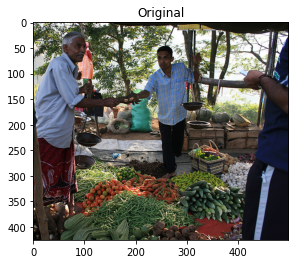

In [102]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

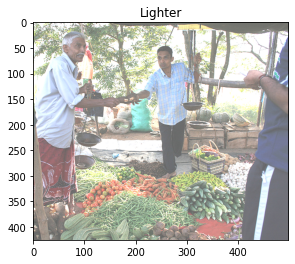

In [103]:
# increasing the pixel intensities in our input image by 100 is
# accomplished by constructing a NumPy array that has the *same
# dimensions* as our input image, filling it with ones, multiplying
# it by 100, and then adding the input image and matrix together
M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)
plt_imshow("Lighter", added)

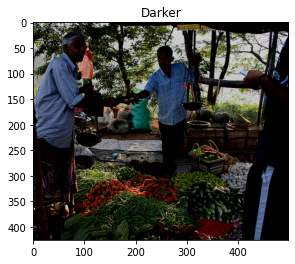

In [104]:
# similarly, we can subtract 50 from all pixels in our image and make it
# darker
M = np.ones(image.shape, dtype="uint8") * 50
subtracted = cv2.subtract(image, M)
plt_imshow("Darker", subtracted)